In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from datetime import datetime, timedelta

In [2]:
data = pd.read_csv("bank-additional-full.csv",sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Explore Data

In [5]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
col = data.columns.tolist()
col_num = data.select_dtypes(include=np.number).columns.tolist()

In [7]:
print("Number of unique values stat:")
data.nunique()

Number of unique values stat:


age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [8]:
data.describe().applymap('{:,.0f}'.format)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,"41,188","41,188","41,188","41,188","41,188","41,188","41,188","41,188","41,188","41,188"
mean,40,258,3,962,0,0,94,-41,4,"5,167"
std,10,259,3,187,0,2,1,5,2,72
min,17,0,1,0,0,-3,92,-51,1,"4,964"
25%,32,102,1,999,0,-2,93,-43,1,"5,099"
50%,38,180,2,999,0,1,94,-42,5,"5,191"
75%,47,319,3,999,0,1,94,-36,5,"5,228"
max,98,"4,918",56,999,7,1,95,-27,5,"5,228"


### Removing Unknown Values

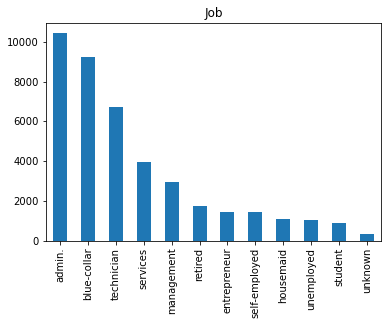

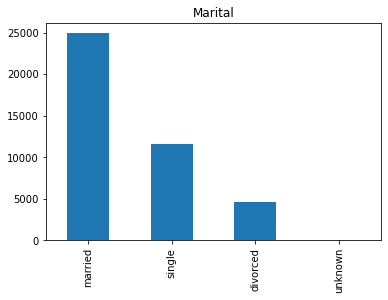

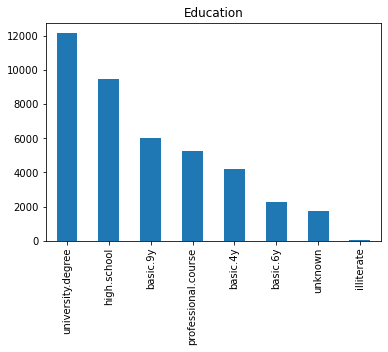

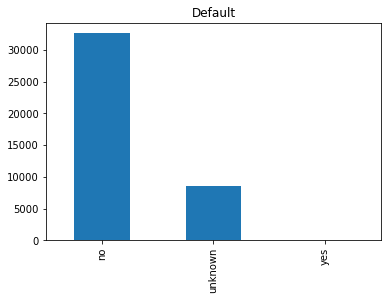

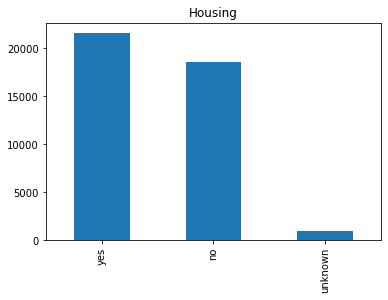

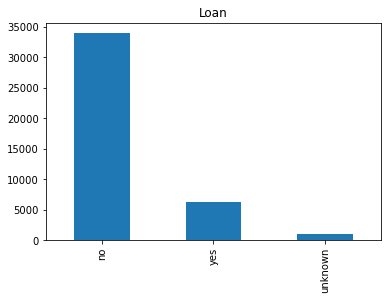

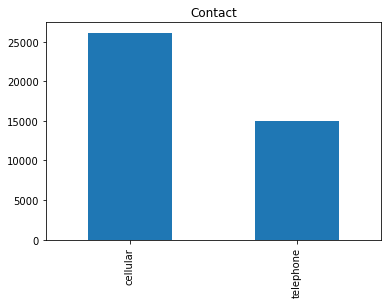

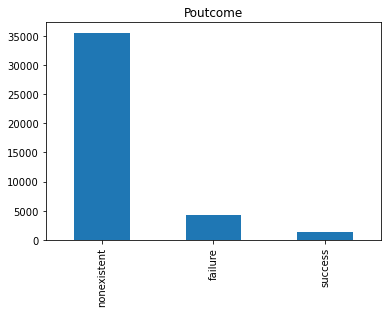

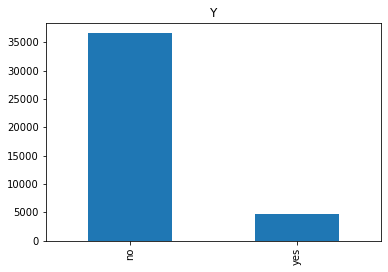

In [9]:
plt.title('Job')
data.job.value_counts().plot(kind='bar')
plt.show()
plt.title('Marital')
data.marital.value_counts().plot(kind='bar')
plt.show()
plt.title('Education')
data.education.value_counts().plot(kind='bar')
plt.show()
plt.title('Default')
data.default.value_counts().plot(kind='bar')  
plt.show()
plt.title('Housing')
data.housing.value_counts().plot(kind='bar')
plt.show()
plt.title('Loan')
data.loan.value_counts().plot(kind='bar')
plt.show()
plt.title('Contact')
data.contact.value_counts().plot(kind='bar')
plt.show()
plt.title('Poutcome')
data.poutcome.value_counts().plot(kind='bar')
plt.show()
plt.title('Y')
data.y.value_counts().plot(kind='bar')
plt.show()

In [10]:
print(data['job'].value_counts())
print(data['marital'].value_counts())
print(data['education'].value_counts())
print(data['default'].value_counts())
print(data['housing'].value_counts())
print(data['loan'].value_counts())
print(data['age'].value_counts())
print(data['contact'].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87   

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
strings = [x for x in data.columns if type(data[x].loc[data[x].first_valid_index()])==str]

for columns in strings:
  print(columns, ':', len(data[data[columns].str.contains('unknown')]))

job : 330
marital : 80
education : 1731
default : 8597
housing : 990
loan : 990
contact : 0
month : 0
day_of_week : 0
poutcome : 0
y : 0


In [13]:
data['default'].value_counts()
## Here, we removed 'yes' values since it has only 3 entries.

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [14]:
data=data.dropna()

In [15]:
data.isnull().mean().sum()

0.0

### Models

In [16]:
## We have to encode alphabetic values to numeric values.
features = [col for col in data.columns if col != "y"]
len(features)

20

In [17]:
features
## Below features should be encoded.
'''
            'job',
            'marital',
            'education',
            'default',
            'housing',
            'loan',
            'contact',
            'month',
            'day_of_week',
            'poutcome'
'''         

"\n            'job',\n            'marital',\n            'education',\n            'default',\n            'housing',\n            'loan',\n            'contact',\n            'month',\n            'day_of_week',\n            'poutcome'\n"

In [18]:
categories = ['job',
            'marital',
            'education',
            'default',
            'housing',
            'loan',
            'contact',
            'month',
            'day_of_week',
            'poutcome']
original_columns = [col for col in features if col not in categories]

In [19]:
original_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [20]:
for column in categories:
    print(column, ":", data[column].unique())

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']


In [21]:
## We have to import sklearn's library and create one-hot encoding object.
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [22]:
one_hot_enc = pd.get_dummies(data, columns = categories)

In [23]:
one_hot_enc.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
## Target values should also be encoded.
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [25]:
one_hot_enc["y"].replace({"yes":1, "no":0}, inplace=True)
one_hot_enc['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(one_hot_enc, train_size = 0.8, random_state = 21)
data_train.shape, data_test.shape

((32950, 64), (8238, 64))

In [27]:
y_train = data_train.pop('y')
X_train = data_train

In [28]:
y_test = data_test.pop('y')
X_test = data_test

In [29]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred = y_pred, y_true = y_test)
print(f'Accuracy of the Logistic Regression model is {accuracy*100:.2f}%')

Accuracy of the Logistic Regression model is 90.87%


In [33]:
## Random Forest Classifier - Ensemble Model
from sklearn.ensemble import RandomForestClassifier

In [34]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
random_forest_predictions = randomForest.predict(X_test)
print("Predicted value: ", random_forest_predictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [1 0 0 1 1 0 0 0 0 0]
Actual value:  29203    0
4243     0
2953     0
39970    1
37999    0
22391    0
1793     0
13687    0
24343    0
30797    0
Name: y, dtype: int64


In [35]:
## Accuracy of the model
accuracy = accuracy_score(y_pred = random_forest_predictions, y_true = y_test)
print(f'Accuracy of the Random Forest Classifier model is {accuracy*100:.2f}%')

Accuracy of the Random Forest Classifier model is 91.36%


In [36]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
decisionTree = DecisionTreeClassifier(random_state=21)
decisionTree.fit(X_train, y_train)
decision_tree_prediction = decisionTree.predict(X_test)
print("Predicted value: ", decision_tree_prediction[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [1 0 0 0 1 0 0 0 0 0]
Actual value:  29203    0
4243     0
2953     0
39970    1
37999    0
22391    0
1793     0
13687    0
24343    0
30797    0
Name: y, dtype: int64


In [38]:
# Accuracy of the model
accuracy = accuracy_score(y_pred = decision_tree_prediction, y_true = y_test)
print(f'Accuracy of the Decision Tree Classifier model is {accuracy*100:.2f}%')

Accuracy of the Decision Tree Classifier model is 89.16%


In [39]:
## Support Vector Classifier
from sklearn.svm import SVC

In [40]:
svc = SVC()
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
print("Predicted value: ", svc_predictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  29203    0
4243     0
2953     0
39970    1
37999    0
22391    0
1793     0
13687    0
24343    0
30797    0
Name: y, dtype: int64


In [41]:
# Accuracy of the model
accuracy = accuracy_score(y_pred = svc_predictions, y_true = y_test)
print(f'Accuracy of the SVC model is {accuracy*100:.2f}%')

Accuracy of the SVC model is 89.72%


In [42]:
# XGBoost 
from xgboost import XGBClassifier

In [43]:
xgb = XGBClassifier(random_state = 21)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)

In [44]:
# Accuracy of the model
accuracy = accuracy_score(y_pred = xgb_predictions, y_true = y_test)
print(f'Accuracy of the XGBoost model is {accuracy*100:.2f}%')

Accuracy of the XGBoost model is 91.50%


In [45]:
from scipy.stats import reciprocal, uniform
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [46]:
from sklearn.model_selection import RandomizedSearchCV

ksvc = Pipeline([('scaler', StandardScaler()),
                   ('svc', SVC(max_iter=50000))
               ])

param_distributions = {"svc__gamma": reciprocal(0.001, 0.1),
                       
                       "svc__C": uniform(1, 10)
                       }
rnd_search_ksvc = RandomizedSearchCV(ksvc, param_distributions,
                                       cv=3, n_iter=10,
                                    n_jobs=-1,
                                       random_state=42)

In [47]:
rnd_search_ksvc.fit(X_train, y_train)

/Users/kmlcgn/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC(max_iter=50000))]),
                   n_jobs=-1,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc3b482baf0>,
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc3b4827250>},
                   random_state=42)

In [48]:
print(rnd_search_ksvc.best_estimator_)
print(rnd_search_ksvc.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=9.324426408004218, gamma=0.0026587543983272693,
                     max_iter=50000))])
0.9099241263788967


In [49]:
y_pred = rnd_search_ksvc.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.9110220927409566

In [50]:
print('Accuracy of the Support Vector Regression model is 0.9039')

Accuracy of the Support Vector Regression model is 0.9039


In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=2,n_estimators=10,
                                learning_rate=0.25,random_state=42)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.25, max_depth=2, n_estimators=10,
                           random_state=42)

In [52]:
y_pred=gbc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9065307113377034

In [53]:
print(f'Accuracy of the Gradient Boosting Classifier model is {accuracy_score(y_test, y_pred)}')

Accuracy of the Gradient Boosting Classifier model is 0.9065307113377034
